# Setting up LangSmith

## Importing required libraries

In [2]:
from typing import Annotated
from typing_extensions import TypedDict

from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.graph.message import add_messages

from langchain_core.tools import tool
from langchain_core.messages import BaseMessage

## Initializing LLM

In [3]:
llm = ChatGroq(model="llama3-8b-8192")

## Creating Tool 

In [5]:
def add(a:int, b:int) -> int:
    """ Add two numbers together. """

    return a + b 

tools = [add]

## Binding LLM with Tools

In [9]:
llm_with_tools = llm.bind_tools(tools)

## Creating State

In [8]:
class State(TypedDict): 
    messages: Annotated[list, add_messages]

## Creating Tool Node

In [11]:
tools = ToolNode(tools=tools)

## Creating Tool Calling LLM Node

In [16]:
def tool_calling_llm(state: State):

    return { "messages" : [llm_with_tools.invoke(state["messages"])]}

## Developing StateGraph

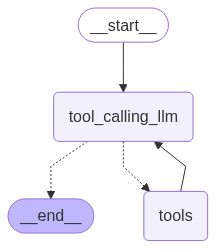

In [17]:
builder = StateGraph(State)

# Add Nodes
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", tools)

# Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm", tools_condition)
builder.add_edge("tools", "tool_calling_llm")

graph = builder.compile()

graph

## Invoking the graph

In [21]:
messages = graph.invoke({"messages" : "Can you add 2+3 and then add the result with 1034?"})["messages"]

for message in messages:
    message.pretty_print()

================================ Human Message =================================

Can you add 2+3 and then add the result with 1034?
================================== Ai Message ==================================
Tool Calls:
  add (6fps2te20)
 Call ID: 6fps2te20
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: add

5
================================== Ai Message ==================================
Tool Calls:
  add (a3asyyfw0)
 Call ID: a3asyyfw0
  Args:
    a: 5
    b: 1034
================================= Tool Message =================================
Name: add

1039
================================== Ai Message ==================================

1039
